In [22]:
import numpy as np
import pandas as pd
import scipy.stats as st
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
train_df = pd.read_csv("data/train.csv")

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [25]:
train_df["Date"] = pd.to_datetime(train_df["Date"])

In [26]:
train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [28]:
#Normalize data to see the relative frequencies of the unique values. Here there are 45 stores.
train_df["Store"].value_counts(normalize=True)

13    0.024845
10    0.024468
4     0.024366
1     0.024300
2     0.024285
24    0.024262
27    0.024255
34    0.024252
20    0.024228
6     0.024221
32    0.024200
19    0.024072
31    0.024058
28    0.023989
41    0.023930
11    0.023868
23    0.023839
14    0.023816
40    0.023761
15    0.023486
8     0.023472
39    0.023431
17    0.023398
18    0.023386
26    0.023375
25    0.023256
7     0.023156
12    0.023021
22    0.022981
45    0.022860
21    0.022729
35    0.022601
29    0.022428
16    0.022400
3     0.021434
5     0.021346
9     0.021033
38    0.017463
37    0.017093
44    0.017005
30    0.016975
42    0.016493
43    0.016014
33    0.015388
36    0.014759
Name: Store, dtype: float64

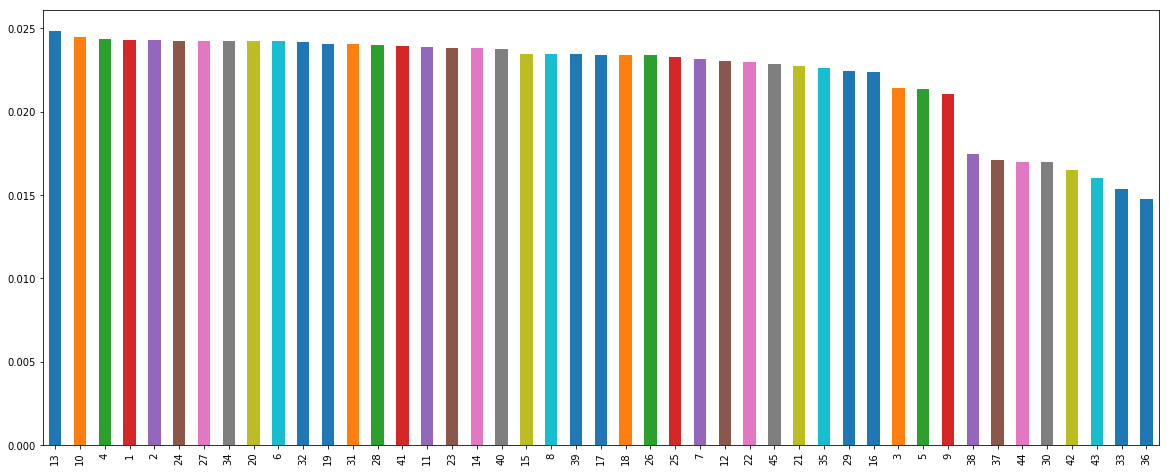

In [29]:
#Plot fairly equal distribution of the stores. 
train_df["Store"].value_counts(normalize=True).plot(kind="bar", figsize = (20,8))

In [30]:
#plt.plot(train_df["Date"], train_df["IsHoliday"])

In [31]:
train_df = pd.get_dummies(train_df, columns=["Store", "Dept"])

In [32]:
train_df.head()

Date  Weekly_Sales  IsHoliday  Store_1  Store_2  Store_3  Store_4  \
0 2010-02-05      24924.50      False        1        0        0        0   
1 2010-02-12      46039.49       True        1        0        0        0   
2 2010-02-19      41595.55      False        1        0        0        0   
3 2010-02-26      19403.54      False        1        0        0        0   
4 2010-03-05      21827.90      False        1        0        0        0   

   Store_5  Store_6  Store_7   ...     Dept_90  Dept_91  Dept_92  Dept_93  \
0        0        0        0   ...           0        0        0        0   
1        0        0        0   ...           0        0        0        0   
2        0        0        0   ...           0        0        0        0   
3        0        0        0   ...           0        0        0        0   
4        0        0        0   ...           0        0        0        0   

   Dept_94  Dept_95  Dept_96  Dept_97  Dept_98  Dept_99  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 129 columns]

In [33]:
train_df['Date_dayofweek'] = train_df['Date'].dt.dayofweek
train_df['Date_month'] = train_df['Date'].dt.month
train_df['Date_year'] = train_df['Date'].dt.year
train_df['Date_day'] = train_df['Date'].dt.day

In [34]:
train_df.head()

Date  Weekly_Sales  IsHoliday  Store_1  Store_2  Store_3  Store_4  \
0 2010-02-05      24924.50      False        1        0        0        0   
1 2010-02-12      46039.49       True        1        0        0        0   
2 2010-02-19      41595.55      False        1        0        0        0   
3 2010-02-26      19403.54      False        1        0        0        0   
4 2010-03-05      21827.90      False        1        0        0        0   

   Store_5  Store_6  Store_7    ...     Dept_94  Dept_95  Dept_96  Dept_97  \
0        0        0        0    ...           0        0        0        0   
1        0        0        0    ...           0        0        0        0   
2        0        0        0    ...           0        0        0        0   
3        0        0        0    ...           0        0        0        0   
4        0        0        0    ...           0        0        0        0   

   Dept_98  Dept_99  Date_dayofweek  Date_month  Date_year  Date_day  
0        0        0               4           2       2010         5  
1        0        0               4           2       2010        12  
2        0        0               4           2       2010        19  
3        0        0               4           2       2010        26  
4        0        0               4           3       2010         5  

[5 rows x 133 columns]

In [35]:
# Extract time-lag features for 1 day, 2 day, 3 day, 5 day, 1 week, 2 week, and a month ago
for days_to_lag in [1, 2, 3, 5, 7, 14, 30]:
    train_df['Weekly_sales_lag_{}'.format(days_to_lag)] = train_df.Weekly_Sales.shift(days_to_lag)

In [36]:
train_df

Date  Weekly_Sales  IsHoliday  Store_1  Store_2  Store_3  \
0      2010-02-05      24924.50      False        1        0        0   
1      2010-02-12      46039.49       True        1        0        0   
2      2010-02-19      41595.55      False        1        0        0   
3      2010-02-26      19403.54      False        1        0        0   
4      2010-03-05      21827.90      False        1        0        0   
5      2010-03-12      21043.39      False        1        0        0   
6      2010-03-19      22136.64      False        1        0        0   
7      2010-03-26      26229.21      False        1        0        0   
8      2010-04-02      57258.43      False        1        0        0   
9      2010-04-09      42960.91      False        1        0        0   
10     2010-04-16      17596.96      False        1        0        0   
11     2010-04-23      16145.35      False        1        0        0   
12     2010-04-30      16555.11      False        1        0        0   
13     2010-05-07      17413.94      False        1        0        0   
14     2010-05-14      18926.74      False        1        0        0   
15     2010-05-21      14773.04      False        1        0        0   
16     2010-05-28      15580.43      False        1        0        0   
17     2010-06-04      17558.09      False        1        0        0   
18     2010-06-11      16637.62      False        1        0        0   
19     2010-06-18      16216.27      False        1        0        0   
20     2010-06-25      16328.72      False        1        0        0   
21     2010-07-02      16333.14      False        1        0        0   
22     2010-07-09      17688.76      False        1        0        0   
23     2010-07-16      17150.84      False        1        0        0   
24     2010-07-23      15360.45      False        1        0        0   
25     2010-07-30      15381.82      False        1        0        0   
26     2010-08-06      17508.41      False        1        0        0   
27     2010-08-13      15536.40      False        1        0        0   
28     2010-08-20      15740.13      False        1        0        0   
29     2010-08-27      15793.87      False        1        0        0   
...           ...           ...        ...      ...      ...      ...   
421540 2012-04-06        778.70      False        0        0        0   
421541 2012-04-13        559.14      False        0        0        0   
421542 2012-04-20        605.80      False        0        0        0   
421543 2012-04-27        619.41      False        0        0        0   
421544 2012-05-04        694.25      False        0        0        0   
421545 2012-05-11        893.60      False        0        0        0   
421546 2012-05-18        745.44      False        0        0        0   
421547 2012-05-25        795.94      False        0        0        0   
421548 2012-06-01        874.64      False        0        0        0   
421549 2012-06-08        713.50      False        0        0        0   
421550 2012-06-15        856.35      False        0        0        0   
421551 2012-06-22        622.62      False        0        0        0   
421552 2012-06-29        690.52      False        0        0        0   
421553 2012-07-06        659.65      False        0        0        0   
421554 2012-07-13        695.21      False        0        0        0   
421555 2012-07-20        845.30      False        0        0        0   
421556 2012-07-27        657.63      False        0        0        0   
421557 2012-08-03        516.46      False        0        0        0   
421558 2012-08-10        727.49      False        0        0        0   
421559 2012-08-17        500.16      False        0        0        0   
421560 2012-08-24        415.40      False        0        0        0   
421561 2012-08-31        346.04      False        0        0        0   
421562 2012-09-07        352.44       True        0        0        0  

In [37]:
train_df.fillna(0, inplace=True)

In [38]:
train_df

Date  Weekly_Sales  IsHoliday  Store_1  Store_2  Store_3  \
0      2010-02-05      24924.50      False        1        0        0   
1      2010-02-12      46039.49       True        1        0        0   
2      2010-02-19      41595.55      False        1        0        0   
3      2010-02-26      19403.54      False        1        0        0   
4      2010-03-05      21827.90      False        1        0        0   
5      2010-03-12      21043.39      False        1        0        0   
6      2010-03-19      22136.64      False        1        0        0   
7      2010-03-26      26229.21      False        1        0        0   
8      2010-04-02      57258.43      False        1        0        0   
9      2010-04-09      42960.91      False        1        0        0   
10     2010-04-16      17596.96      False        1        0        0   
11     2010-04-23      16145.35      False        1        0        0   
12     2010-04-30      16555.11      False        1        0        0   
13     2010-05-07      17413.94      False        1        0        0   
14     2010-05-14      18926.74      False        1        0        0   
15     2010-05-21      14773.04      False        1        0        0   
16     2010-05-28      15580.43      False        1        0        0   
17     2010-06-04      17558.09      False        1        0        0   
18     2010-06-11      16637.62      False        1        0        0   
19     2010-06-18      16216.27      False        1        0        0   
20     2010-06-25      16328.72      False        1        0        0   
21     2010-07-02      16333.14      False        1        0        0   
22     2010-07-09      17688.76      False        1        0        0   
23     2010-07-16      17150.84      False        1        0        0   
24     2010-07-23      15360.45      False        1        0        0   
25     2010-07-30      15381.82      False        1        0        0   
26     2010-08-06      17508.41      False        1        0        0   
27     2010-08-13      15536.40      False        1        0        0   
28     2010-08-20      15740.13      False        1        0        0   
29     2010-08-27      15793.87      False        1        0        0   
...           ...           ...        ...      ...      ...      ...   
421540 2012-04-06        778.70      False        0        0        0   
421541 2012-04-13        559.14      False        0        0        0   
421542 2012-04-20        605.80      False        0        0        0   
421543 2012-04-27        619.41      False        0        0        0   
421544 2012-05-04        694.25      False        0        0        0   
421545 2012-05-11        893.60      False        0        0        0   
421546 2012-05-18        745.44      False        0        0        0   
421547 2012-05-25        795.94      False        0        0        0   
421548 2012-06-01        874.64      False        0        0        0   
421549 2012-06-08        713.50      False        0        0        0   
421550 2012-06-15        856.35      False        0        0        0   
421551 2012-06-22        622.62      False        0        0        0   
421552 2012-06-29        690.52      False        0        0        0   
421553 2012-07-06        659.65      False        0        0        0   
421554 2012-07-13        695.21      False        0        0        0   
421555 2012-07-20        845.30      False        0        0        0   
421556 2012-07-27        657.63      False        0        0        0   
421557 2012-08-03        516.46      False        0        0        0   
421558 2012-08-10        727.49      False        0        0        0   
421559 2012-08-17        500.16      False        0        0        0   
421560 2012-08-24        415.40      False        0        0        0   
421561 2012-08-31        346.04      False        0        0        0   
421562 2012-09-07        352.44       True        0        0        0  

In [39]:
#target
target = train_df["Weekly_Sales"]
features = train_df.drop("Date", axis=1)
features = features.drop("Weekly_Sales", axis=1)

In [40]:
features.head()

IsHoliday  Store_1  Store_2  Store_3  Store_4  Store_5  Store_6  Store_7  \
0      False        1        0        0        0        0        0        0   
1       True        1        0        0        0        0        0        0   
2      False        1        0        0        0        0        0        0   
3      False        1        0        0        0        0        0        0   
4      False        1        0        0        0        0        0        0   

   Store_8  Store_9         ...           Date_month  Date_year  Date_day  \
0        0        0         ...                    2       2010         5   
1        0        0         ...                    2       2010        12   
2        0        0         ...                    2       2010        19   
3        0        0         ...                    2       2010        26   
4        0        0         ...                    3       2010         5   

   Weekly_sales_lag_1  Weekly_sales_lag_2  Weekly_sales_lag_3  \
0                0.00                0.00                0.00   
1            24924.50                0.00                0.00   
2            46039.49            24924.50                0.00   
3            41595.55            46039.49            24924.50   
4            19403.54            41595.55            46039.49   

   Weekly_sales_lag_5  Weekly_sales_lag_7  Weekly_sales_lag_14  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   Weekly_sales_lag_30  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 138 columns]

In [41]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25)

In [ ]:
display(features_train.shape)
display(features_test.shape)

(316177, 138)

(105393, 138)

In [25]:
display(target_train.shape)
display(target_test.shape)

(316177,)

(105393,)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [27]:
lr = LinearRegression()
rf = RandomForestRegressor()

In [28]:
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lr.score(features_test, target_test)

0.91995434913867102

In [31]:
rf.fit(features_train, target_train)
rf.score(features_test, target_test)

0.96149757855706719

In [50]:
prediction = lr.predict(features_test)

In [51]:
len(prediction)

105393

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
mean_absolute_error(target_test, prediction)

2390.9031295144814

In [54]:
mean_squared_error(target_test, prediction)

41376210.34978427